In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import urllib #download from football data

from __future__ import division
%matplotlib inline

### Load the data

In [3]:
testfile = urllib.URLopener()
testfile.retrieve("http://www.football-data.co.uk/mmz4281/1617/E0.csv", "./Data/England/E0_16.csv")

('./Data/England/E0_16.csv', <httplib.HTTPMessage instance at 0x7f796fc5f950>)

In [4]:
df = pd.read_csv("./Data/England/E0_16.csv")

In [5]:
df.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR', u'B365H',
       u'B365D', u'B365A', u'BWH', u'BWD', u'BWA', u'IWH', u'IWD', u'IWA',
       u'LBH', u'LBD', u'LBA', u'PSH', u'PSD', u'PSA', u'WHH', u'WHD', u'WHA',
       u'VCH', u'VCD', u'VCA', u'Bb1X2', u'BbMxH', u'BbAvH', u'BbMxD',
       u'BbAvD', u'BbMxA', u'BbAvA', u'BbOU', u'BbMx>2.5', u'BbAv>2.5',
       u'BbMx<2.5', u'BbAv<2.5', u'BbAH', u'BbAHh', u'BbMxAHH', u'BbAvAHH',
       u'BbMxAHA', u'BbAvAHA', u'PSCH', u'PSCD', u'PSCA'],
      dtype='object')

### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [6]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

In [7]:
res_16.head()
feature_table = df.ix[:,:23]

In [8]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
288,Man United,West Brom,0,0,D,0,0,D,M Dean,18,...,3,1,15,13,6,1,3,3,0,0
289,Southampton,Bournemouth,0,0,D,0,0,D,J Moss,14,...,4,3,14,8,6,3,1,0,0,0
290,Watford,Sunderland,1,0,H,0,0,D,L Probert,23,...,10,3,12,8,13,9,1,3,0,0
291,Arsenal,Man City,2,2,D,1,2,A,A Marriner,8,...,3,5,8,15,3,8,3,2,0,0
292,Swansea,Middlesbrough,0,0,D,0,0,D,R Madley,15,...,3,1,9,16,11,3,2,3,0,0


In [9]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))

In [10]:
res_16.shape[0]

293

In [11]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print "Average number of goals at home",avg_home_scored_16
print "Average number of goals away", avg_away_scored_16
print "Average number of goals conceded at home",avg_home_conceded_16
print "Average number of goals conceded away",avg_away_conceded_16

Average number of goals at home 1.60750853242
Average number of goals away 1.20136518771
Average number of goals conceded at home 1.20136518771
Average number of goals conceded away 1.60750853242


In [12]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [13]:
# list(res_home)[0]

In [14]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,28,30,NaN,NaN,15,21,NaN,NaN
1,Bournemouth,26,16,NaN,NaN,23,31,NaN,NaN
2,Burnley,22,9,NaN,NaN,14,30,NaN,NaN
3,Chelsea,37,23,NaN,NaN,10,13,NaN,NaN
4,Crystal Palace,15,23,NaN,NaN,20,27,NaN,NaN
5,Everton,34,18,NaN,NaN,10,23,NaN,NaN
6,Hull,21,7,NaN,NaN,24,35,NaN,NaN
7,Leicester,24,11,NaN,NaN,18,29,NaN,NaN
8,Liverpool,39,25,NaN,NaN,14,23,NaN,NaN
9,Man City,24,32,NaN,NaN,14,18,NaN,NaN


In [15]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [16]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,28,30,1.188960,1.704545,15,21,0.852273,0.891720
1,Bournemouth,26,16,1.104034,0.909091,23,31,1.306818,1.316348
2,Burnley,22,9,0.934183,0.511364,14,30,0.795455,1.273885
3,Chelsea,37,23,1.571125,1.306818,10,13,0.568182,0.552017
4,Crystal Palace,15,23,0.636943,1.306818,20,27,1.136364,1.146497
5,Everton,34,18,1.443737,1.022727,10,23,0.568182,0.976645
6,Hull,21,7,0.891720,0.397727,24,35,1.363636,1.486200
7,Leicester,24,11,1.019108,0.625000,18,29,1.022727,1.231423
8,Liverpool,39,25,1.656051,1.420455,14,23,0.795455,0.976645
9,Man City,24,32,1.019108,1.818182,14,18,0.795455,0.764331


In [17]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,21,15,0.89172,0.852273,30,33,1.704545,1.401274


In [18]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [19]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Burnley,Swansea,A,3,9,0.934183,0.795455,0.852273,1.401274
1,Crystal Palace,West Brom,A,4,3,0.636943,1.136364,0.681818,0.849257
2,Everton,Tottenham,D,6,4,1.443737,0.568182,1.250000,0.552017
3,Hull,Leicester,H,5,5,0.891720,1.363636,0.625000,1.231423
4,Man City,Sunderland,H,4,3,1.019108,0.795455,0.568182,1.061571
5,Middlesbrough,Stoke,D,2,1,0.509554,0.965909,0.795455,1.146497
6,Southampton,Watford,D,6,1,0.594480,0.795455,0.681818,1.061571
7,Arsenal,Liverpool,A,5,7,1.188960,0.852273,1.420455,0.976645
8,Bournemouth,Man United,A,3,7,1.104034,1.306818,1.250000,0.552017
9,Chelsea,West Ham,H,6,3,1.571125,0.568182,1.363636,1.146497


In [20]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [21]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [22]:
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
283,Burnley,Tottenham,A,2,7,0.934183,0.795455,1.250000,0.552017,-1
284,Chelsea,Crystal Palace,A,11,3,1.571125,0.568182,1.306818,1.146497,-1
285,Hull,West Ham,H,3,4,0.891720,1.363636,1.363636,1.146497,1
286,Leicester,Stoke,H,10,2,1.019108,1.022727,0.795455,1.146497,1
287,Liverpool,Everton,H,6,4,1.656051,0.795455,1.022727,0.976645,1
288,Man United,West Brom,D,3,1,0.849257,0.568182,0.681818,0.849257,0
289,Southampton,Bournemouth,D,4,3,0.594480,0.795455,0.909091,1.316348,0
290,Watford,Sunderland,H,10,3,0.934183,1.306818,0.568182,1.061571,1
291,Arsenal,Man City,D,3,5,1.188960,0.852273,1.818182,0.764331,0
292,Swansea,Middlesbrough,D,3,1,0.891720,1.704545,0.454545,0.679406,0


In [23]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [25]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [26]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.48387097  0.63333333  0.6         0.63333333  0.44827586  0.62068966
  0.55172414  0.55172414  0.78571429  0.67857143]
0.59872371418


In [27]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.41935484  0.56666667  0.5         0.63333333  0.48275862  0.51724138
  0.51724138  0.5862069   0.60714286  0.57142857]
0.540137454314


In [28]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.58064516  0.66666667  0.53333333  0.63333333  0.62068966  0.75862069
  0.55172414  0.62068966  0.67857143  0.64285714]
0.628713120398


In [29]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print scores
print scores.mean()

[ 0.41935484  0.56666667  0.63333333  0.6         0.5862069   0.5862069
  0.51724138  0.65517241  0.67857143  0.71428571]
0.595703956777


## Adding Recent Performance

In [30]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [31]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [32]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Chelsea','Man City','D',0,0,0,0,0,0],
                             ['Liverpool','Bournemouth','D',0,0,0,0,0,0],
                             ['Southampton','Crystal Palace','D',0,0,0,0,0,0],
                             ['Hull','Middlesbrough','D',0,0,0,0,0,0],
                             ['Arsenal','West Ham','D',0,0,0,0,0,0],
                             ['Swansea','Tottenham','D',0,0,0,0,0,0],
                             ['Man United','Everton','D',0,0,0,0,0,0],
                             ['Leicester','Sunderland','D',0,0,0,0,0,0],
                             ['Burnley','Stoke','D',0,0,0,0,0,0],
                             ['Watford','West Brom','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [33]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(303, 9)

In [34]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [35]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
302,Chelsea,Man City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
301,Liverpool,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
300,Southampton,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
299,Hull,Middlesbrough,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
298,Arsenal,West Ham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
297,Swansea,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
296,Man United,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
295,Leicester,Sunderland,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
294,Burnley,Stoke,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
293,Watford,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [43]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/sibi/acad/prog_tools/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [43]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [44]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [45]:
# num_games decides the train-test split
print feat_table.shape
num_games = feat_table.shape[0]-10
num_games

(303, 19)


293

In [46]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [47]:
### Try predictions here too.

# Adding home advantage

In [40]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

NameError: name 'test_table' is not defined

In [41]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set(240 fixtures) for validation.''' 
num_games = feat_table.shape[0]-10
print num_games
v_split = 20
n_games = num_games - v_split

293


In [38]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

NameError: name 'test_table' is not defined

In [39]:
X_predict

NameError: name 'X_predict' is not defined

In [52]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [53]:
#KNN
plot_scores_knn = []
for b in xrange(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in xrange(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


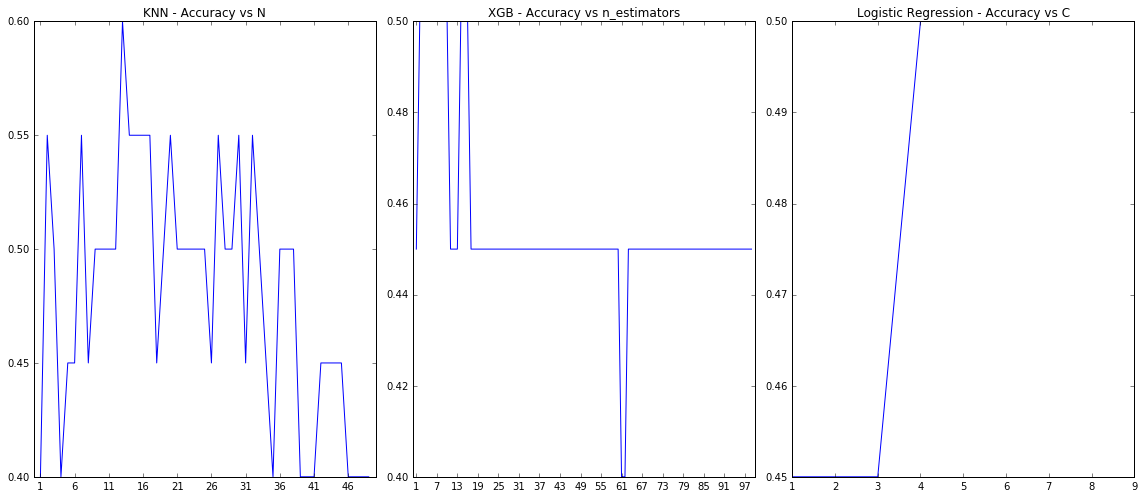

In [54]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(xrange(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(xrange(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(xrange(1,100),plot_scores_XGB);
ax2.set_xticks(xrange(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(xrange(1,10),plot_scores_logreg);
ax3.set_xticks(xrange(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [58]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print max_knn_n, max_knn_ind
print max_XGB_e, max_XGB_ind
print max_logreg_c, max_logreg_ind


0.6 12
0.5 1
0.5 3


In [59]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [60]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [61]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [62]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
293,Watford,West Brom,1,1,1
294,Burnley,Stoke,1,1,1
295,Leicester,Sunderland,-1,1,1
296,Man United,Everton,0,1,1
297,Swansea,Tottenham,-1,0,-1
298,Arsenal,West Ham,1,1,1
299,Hull,Middlesbrough,0,0,1
300,Southampton,Crystal Palace,-1,-1,1
301,Liverpool,Bournemouth,1,1,1
302,Chelsea,Man City,1,1,1


In [63]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [64]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [65]:
print max_knn_n, max_XGB_e, max_logreg_c
this_week

0.6 0.5 0.5


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
293,Watford,West Brom,H,H,H
294,Burnley,Stoke,H,H,H
295,Leicester,Sunderland,A,H,H
296,Man United,Everton,D,H,H
297,Swansea,Tottenham,A,D,A
298,Arsenal,West Ham,H,H,H
299,Hull,Middlesbrough,D,D,H
300,Southampton,Crystal Palace,A,A,H
301,Liverpool,Bournemouth,H,H,H
302,Chelsea,Man City,H,H,H
